<a href="https://colab.research.google.com/github/agargya123/TiktokSpotifystats/blob/main/V6_Spotify_TikTok_virality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

# uploaded = files.upload()

Mounted at /content/drive


In [3]:
#spotify_df = pd.read_excel('/content/drive/Shared_with_me/Lorena_project/spotify_2022_data.xlsx')
df_tiktok = pd.read_excel('/content/drive/MyDrive/01_TikTok_songs_2022.xlsx', sheet_name='tiktok')

df_tiktok.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [4]:
#spotify_df = pd.read_excel('/content/drive/Shared_with_me/Lorena_project/spotify_2022_data.xlsx')
df_spotify = pd.read_excel('/content/drive/MyDrive/01_spotify_2022_data.xlsx', sheet_name='spotify')

df_spotify.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [5]:
pip install fuzzywuzzy python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.4 MB/s eta 0:00:00


In [6]:
from fuzzywuzzy import process, fuzz
import pandas as pd

# Define a function to find the best match in another DataFrame
def get_best_match(row, match_df, column_name, scorer, cutoff):
    """
    Finds the best match for a given string in a specified DataFrame column.

    Parameters:
    - row: The row of the DataFrame from which to extract the string to match.
    - match_df: The DataFrame in which to search for a match.
    - column_name: The name of the column in match_df to search for the match.
    - scorer: The scoring function from fuzzywuzzy to use for matching.
    - cutoff: The minimum score to consider a match valid.

    Returns:
    - The best match found, or None if no valid match is found above the cutoff.
    """
    best_match = process.extractOne(row['track_name'], match_df[column_name], scorer=scorer)
    if best_match and best_match[1] >= cutoff:
        return best_match[0]
    else:
        return None
df_spotify_2 = df_spotify
# Example usage to add a 'best_match_name' column to spotify_data
df_spotify_2['best_match_name'] = df_spotify_2.apply(get_best_match, match_df=df_tiktok, column_name='track_name', scorer=fuzz.WRatio, cutoff=80, axis=1)

# Merge the DataFrames based on the 'best_match_name' in spotify_data and 'track_name' in tiktok_data
merged_data_2 = pd.merge(df_spotify_2, df_tiktok, left_on='best_match_name', right_on='track_name', how='inner')

# The merged_data DataFrame now contains matched records based on fuzzy matching of track names


TypeError: expected string or bytes-like object

In [10]:
from fuzzywuzzy import process
import pandas as pd

# Assuming spotify_data and tiktok_data are your DataFrames and they're properly loaded
# Let's say both have columns named 'track_name' for the song titles and 'artist_name' for artist names

# Define a helper function to apply fuzzy matching
def fuzzy_merge(df_left, df_right, key_left, key_right, threshold=90, limit=1):
    """
    Merge two DataFrames using fuzzy matching on specified keys with a score threshold.

    Parameters:
    - df_left: DataFrame to be merged (left).
    - df_right: DataFrame to match against (right).
    - key_left: Key column name in the left DataFrame.
    - key_right: Key column name in the right DataFrame.
    - threshold: Score threshold for a match to be considered valid.
    - limit: Maximum number of matches to return (default is 1).

    Returns:
    - Merged DataFrame with matches above the specified score threshold.
    """
    # Find potential matches for each entry in the left DataFrame
    s = df_left[key_left].apply(lambda x: process.extract(x, df_right[key_right], limit=limit))

    # Filter out non-matches below the threshold
    s = s.apply(lambda x: [i for i in x if i[1] >= threshold])

    # If no matches, return None; otherwise, return the best match
    s = s.apply(lambda x: x[0][0] if x else None)

    # Map the original strings from the right DataFrame based on the matches
    df_left[key_left] = s.map(df_right.set_index(key_right).index)

    # Merge the DataFrames based on the identified matches
    merged_df = pd.merge(df_left, df_right, left_on=key_left, right_on=key_right, how='left')

    return merged_df

# Apply the fuzzy_merge function to your DataFrames
merged_data = fuzzy_merge(df_tiktok, df_spotify, 'track_name', 'track_name', threshold=90)

# Now merged_data should contain your matched records
# Note: You may need to adjust 'threshold' based on how strict you want the matching to be


TypeError: 'Index' object is not callable

In [41]:
df_tiktok.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


In [11]:
merged_df = pd.merge(df_tiktok, df_spotify, on='track_name')

In [12]:
merged_df

,track_name,artist_name,artist_pop,album,track_pop,danceability_x,energy_x,loudness_x,mode_x,key_x,...,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,tempo_y,time_signature_y,duration_ms_y
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,...,10,-13.123,0,0.0550,0.720000,0.003140,0.0604,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,...,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,173.930,4,167303
2,As It Was,Michael Shynes,52,As It Was,46,0.595,0.812,-5.623,1,9,...,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,173.930,4,167303
3,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,...,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,131.443,4,163026
4,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,...,11,-6.900,1,0.0944,0.440000,0.000007,0.0921,80.870,4,238805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Payphone,Faruk Orman,43,Payphone,45,0.721,0.707,-7.953,1,11,...,4,-4.813,1,0.0414,0.018800,0.000000,0.2870,110.015,4,231173
81,Demons,CPX,52,Demons,56,0.700,0.848,-5.473,1,8,...,3,-3.015,1,0.0321,0.190000,0.000250,0.2690,89.938,4,177507
82,Without Me,Halsey,83,Without Me,77,0.752,0.488,-7.050,1,6,...,7,-2.827,1,0.0738,0.002860,0.000000,0.2370,112.238,4,290320
83,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,...,1,-2.958,1,0.0259,0.015700,0.000000,0.0864,116.959,3,233720


<Axes: title={'center': 'Danceability Vs Popularity'}, xlabel='TikTok Popularity', ylabel='Danceability'>

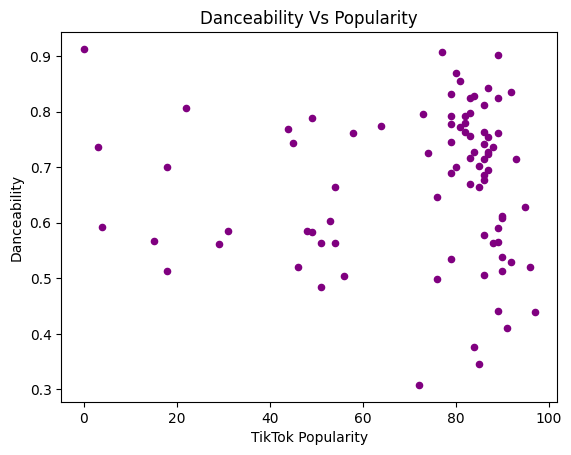

In [13]:
#Track popularity seems positively correlated to danceability

merged_df.plot.scatter(x='track_pop', y='danceability_y', color='purple', title='Danceability Vs Popularity', xlabel='TikTok Popularity', ylabel="Danceability")


<Axes: title={'center': 'Energy Vs Popularity'}, xlabel='TikTok Popularity', ylabel='Energy'>

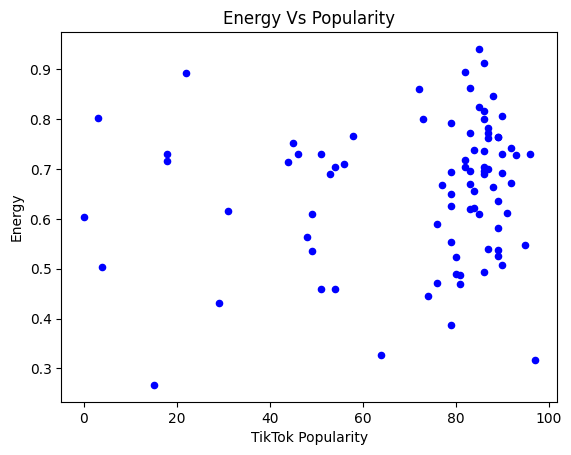

In [ ]:
#Track popularity seems positively correlated to danceability

merged_df.plot.scatter(x='track_pop', y='energy_y', color='blue', title='Energy Vs Popularity', xlabel='TikTok Popularity', ylabel="Energy")


<Axes: title={'center': 'Peak Rank Vs Popularity'}, xlabel='Tiktok Popularity', ylabel='Peak Rank on Spotify'>

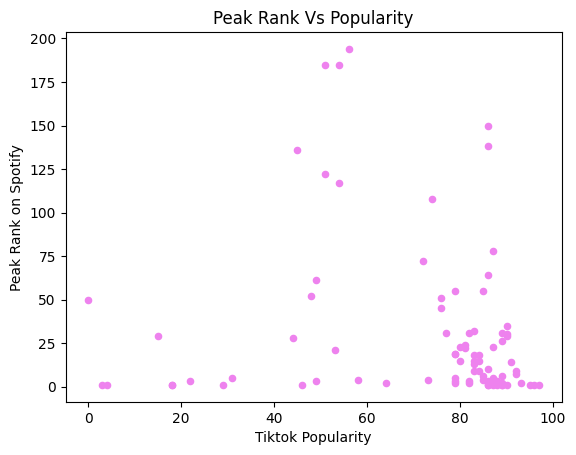

In [14]:
#Peak rank and Track Popularity appear to be highly correlated

merged_df.plot.scatter(y='peak_rank', x='track_pop', color='violet', title='Peak Rank Vs Popularity', xlabel='Tiktok Popularity', ylabel='Peak Rank on Spotify')

<Axes: title={'center': 'Weeks on Chart Vs Track Popularity'}, xlabel='Tiktok Popularity', ylabel='Weeks on Spotify Charts'>

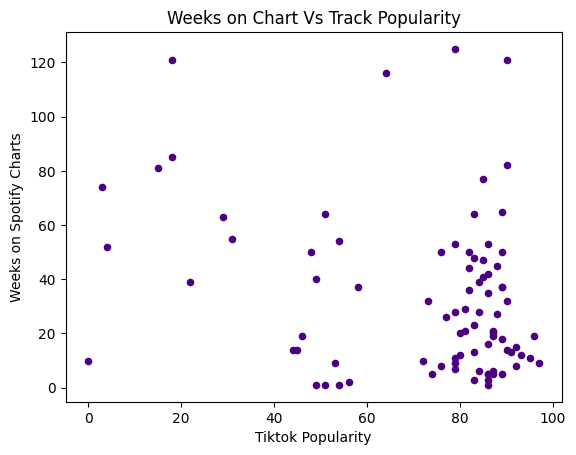

In [15]:
#Weeks on chart and Track popularity are related but not strongly correlated

merged_df.plot.scatter(y='weeks_on_chart', x='track_pop', color='indigo', xlabel="Tiktok Popularity", ylabel="Weeks on Spotify Charts", title="Weeks on Chart Vs Track Popularity")

Correlation Matrix:
                peak_rank  weeks_on_chart  track_pop  energy_x  duration_ms_x
peak_rank        1.000000       -0.325262  -0.145370  0.232564      -0.209200
weeks_on_chart  -0.325262        1.000000  -0.276708  0.151269       0.006825
track_pop       -0.145370       -0.276708   1.000000 -0.052630       0.182940
energy_x         0.232564        0.151269  -0.052630  1.000000      -0.295320
duration_ms_x   -0.209200        0.006825   0.182940 -0.295320       1.000000

Pairs of Highly Correlated Variables:
                peak_rank  weeks_on_chart  track_pop  energy_x  duration_ms_x
peak_rank           False           False      False     False          False
weeks_on_chart      False           False      False     False          False
track_pop           False           False      False     False          False
energy_x            False           False      False     False          False
duration_ms_x       False           False      False     False          False


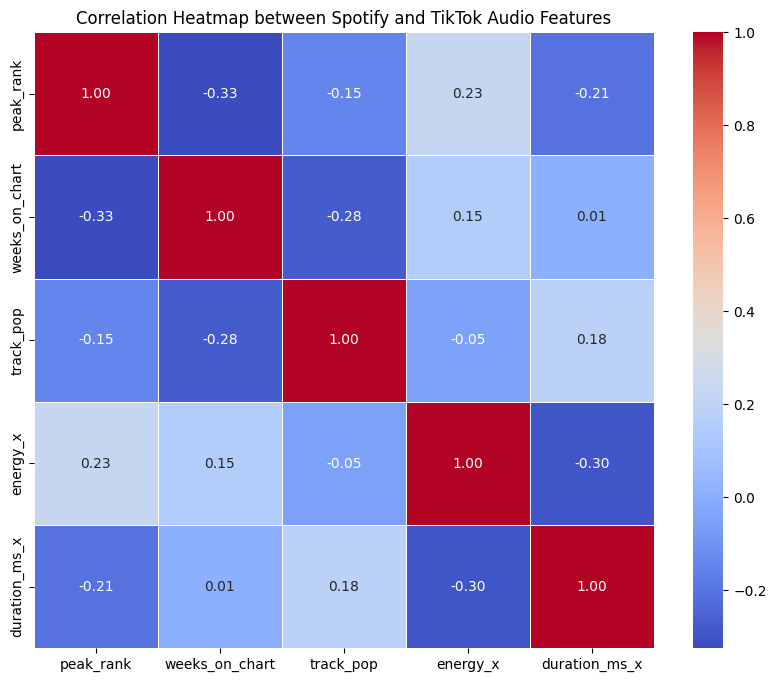

In [39]:
#Correlation Matrix

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Select common audio features for correlation analysis
audio_features_spotify = ['peak_rank', 'weeks_on_chart']
audio_features_tiktok = ['track_pop', 'energy_x', 'duration_ms_x'] #added #energy because of correlation analysis, out of the acousticness, loudness, and energy

# Display correlation matrix for selected features
correlation_matrix = merged_df[audio_features_spotify + audio_features_tiktok].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Find highly correlated variables
threshold = 0.7  # Adjust the threshold as needed
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)

# Display pairs of highly correlated variables
print("\nPairs of Highly Correlated Variables:")
print(highly_correlated)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Spotify and TikTok Audio Features')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(merged_df, x='track_pop', y='weeks_on_chart', z='peak_rank', color='energy_y')
fig.show()

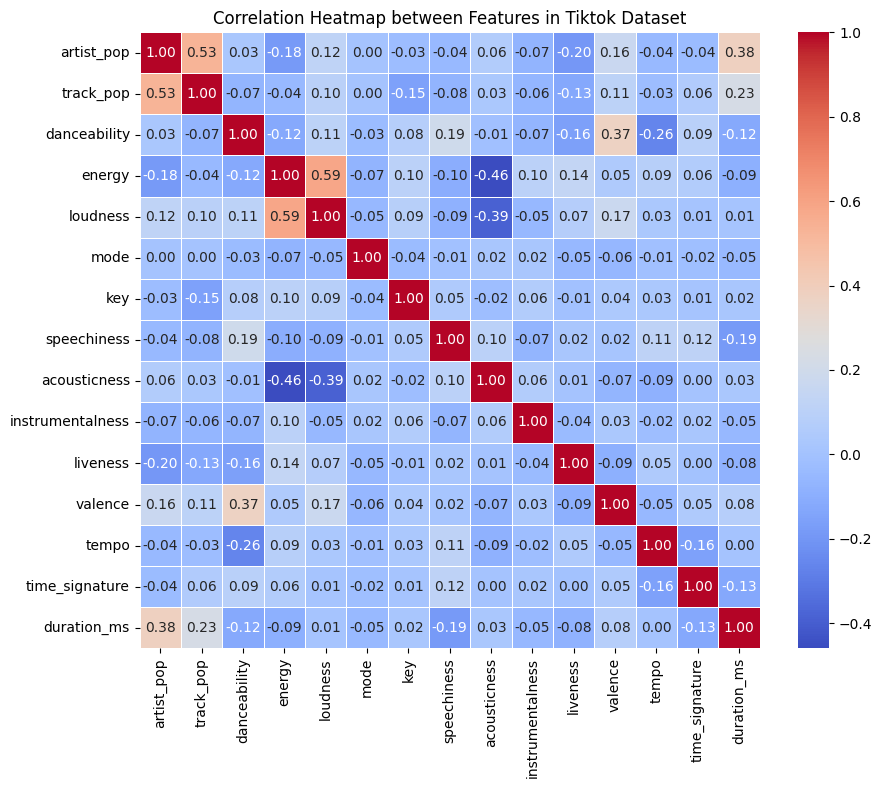

In [31]:
#Correlation Matrix

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

df_tiktok_num = df_tiktok.select_dtypes(include=['number'])
tiktok_corr = df_tiktok_num.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tiktok_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Features in Tiktok Dataset')
plt.show()

In [ ]:
#According to this energy and acousticness are highly correlated; Loudness and energy also show correlation
#artist popularity and track popularity also show some correlation as well as artist_popularity with the duration of the song in miliseconds.

In [17]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Assuming df is your DataFrame, and 'var1', 'var2' are your columns
pearson_coeff, pearson_pval = pearsonr(merged_df['track_pop'], merged_df['weeks_on_chart'])
spearman_coeff, spearman_pval = spearmanr(merged_df['track_pop'], merged_df['weeks_on_chart'])
kendall_coeff, kendall_pval = kendalltau(merged_df['track_pop'], merged_df['weeks_on_chart'])


In [21]:
print(f"Pearson's coefficient: {pearson_coeff:.2f}, p-value: {pearson_pval:.2f}")
print(f"Spearman's coefficient: {spearman_coeff:.2f}, p-value: {spearman_pval:.2f}")
print(f"Kendall's coefficient: {kendall_coeff:.2f}, p-value: {kendall_pval:.2f}")


Pearson's coefficient: -0.28, p-value: 0.01
Spearman's coefficient: -0.17, p-value: 0.12
Kendall's coefficient: -0.12, p-value: 0.12


In [ ]:
#Considering seemingly strong positive correlation between peak_rank and track popularity, we run a simple linear regression to explore this further.

import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)
X = merged_df['track_pop']
Y = merged_df['peak_rank']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              peak_rank   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.792
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.184
Time:                        00:10:56   Log-Likelihood:                -444.20
No. Observations:                  85   AIC:                             892.4
Df Residuals:                      83   BIC:                             897.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7740     15.777      3.218      0.0

In [ ]:
#with a p-value of 0.184, we are not able to reject the null hypothesis. This means we could be exploring a non-linear relationship or the regression is
# thrown off by outliers in the peak_rank model. Let us explore the boxplot for this variable and its basic statistics.

In [ ]:
merged_df['peak_rank'].median()

13.0

In [ ]:
merged_df['peak_rank'].mean()

30.71764705882353

In [ ]:
merged_df['peak_rank'].std()

45.76820786900681

<Axes: >

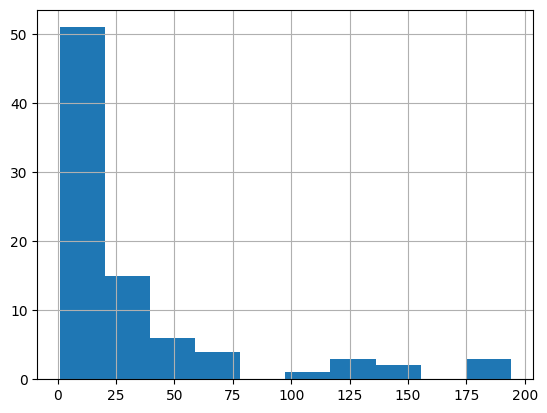

In [ ]:
merged_df['peak_rank'].hist()

In [ ]:
merged_df['weeks_on_chart'].std()

29.46972049019651

In [ ]:
merged_df['weeks_on_chart'].mean()

33.15294117647059

In [ ]:
merged_df['weeks_on_chart'].median()

26.0

<ipython-input-21-cd14185e0e9e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




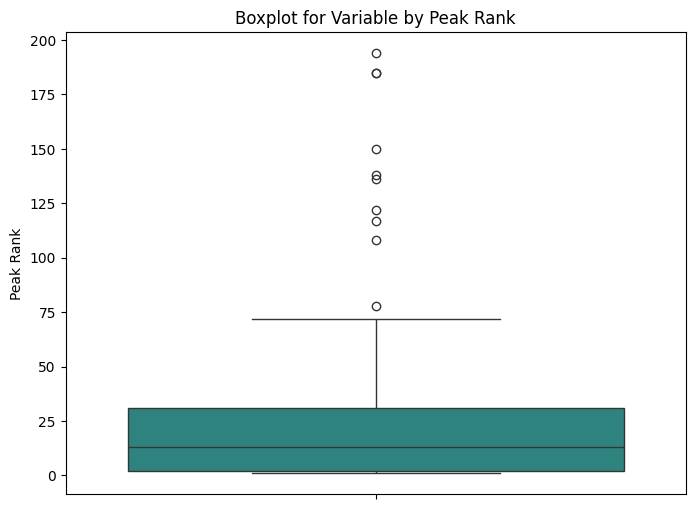

In [ ]:
#Boxplot for Peak Rank

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='peak_rank', data=merged_df, palette='viridis')
plt.title('Boxplot for Variable by Peak Rank')
plt.ylabel('Peak Rank')
plt.show()

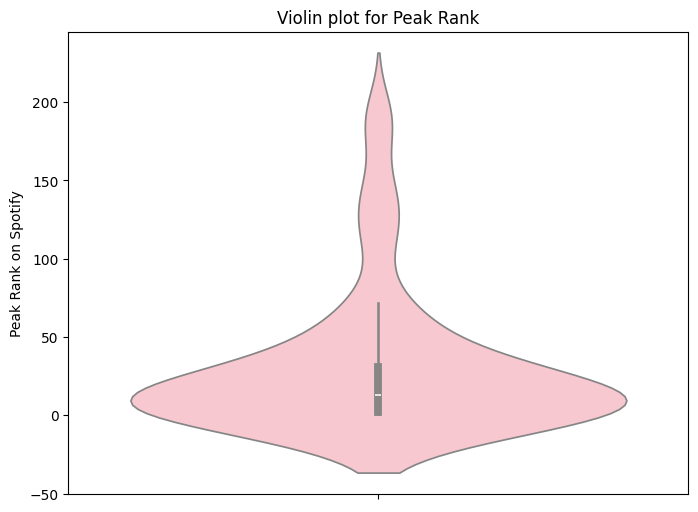

In [ ]:
# Create a Violin Plot for Peak Rank
plt.figure(figsize=(8, 6))
sns.violinplot(y='peak_rank', data=merged_df, color='pink')
plt.title('Violin plot for Peak Rank')
plt.ylabel('Peak Rank on Spotify')
plt.show()

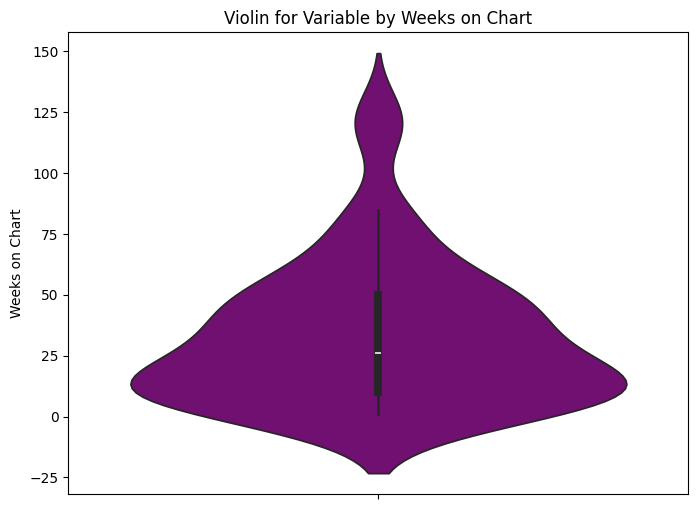

In [ ]:
# Create a Violin plot on weeks on chart
plt.figure(figsize=(8, 6))
sns.violinplot(y='weeks_on_chart', data=merged_df, color='purple')
plt.title('Violin for Variable by Weeks on Chart')
plt.ylabel('Weeks on Chart')
plt.show()

In [ ]:
#The boxplot clearly shows that there are a significant outliers for Peak_rank. We can replace the outliers with the median of this population for this analysis

In [ ]:
#Replacing the outliers for peak_rank in the merged dataset with the median

median_value = merged_df['peak_rank'].median()
Q1 = merged_df['peak_rank'].quantile(0.25)
Q3 = merged_df['peak_rank'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
merged_df['peak_rank'] = merged_df['peak_rank'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [ ]:
#Max value of peak rank is now 72 instead of 194.
merged_df['peak_rank'].max()

72.0

In [ ]:
result = merged_df.loc[merged_df['track_name']=="Demons"] #initial value was 194
result['peak_rank']

81    13.0
Name: peak_rank, dtype: float64

In [ ]:
#After modifying the dataset, we will perform the regression again, to see if there is a significant difference
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df['track_pop']
Y = merged_df['peak_rank']
# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              peak_rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.07846
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.780
Time:                        00:10:57   Log-Likelihood:                -361.55
No. Observations:                  85   AIC:                             727.1
Df Residuals:                      83   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2107      5.966      2.885      0.0

In [ ]:
# Simple Linear Regression between Track Popularity and Weeks on Chart

import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df['track_pop']
Y = merged_df['weeks_on_chart']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())


'''The P-value associated with weeks_on_chart is significant, 0.010 <0.05 considering the typical value of alpha=0.05
This indicates that popular tracks on TikTok will enjoy more weeks on Spotify Charts '''

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.882
Date:                Sun, 07 Apr 2024   Prob (F-statistic):             0.0104
Time:                        00:10:57   Log-Likelihood:                -404.31
No. Observations:                  85   AIC:                             812.6
Df Residuals:                      83   BIC:                             817.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.7346      9.867      5.851      0.0

'The P-value associated with weeks_on_chart is significant, 0.010 <0.05 considering the typical value of alpha=0.05\nThis indicates that popular tracks on TikTok will enjoy more weeks on Spotify Charts '

In [ ]:
#Logarithmic Regression

import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df['track_pop']
Y = merged_df['peak_rank']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              peak_rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.07846
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.780
Time:                        00:10:57   Log-Likelihood:                -361.55
No. Observations:                  85   AIC:                             727.1
Df Residuals:                      83   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2107      5.966      2.885      0.0

In [54]:
merged_df_2 = merged_df
merged_df_2['duration_ms'] = merged_df_2['duration_ms_x']/1000
#merged_df_2['track_pop'] = merged_df_2['track_pop']/100

In [55]:
#Multiple Regression
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df_2[['track_pop', 'danceability_x', 'energy_x', 'duration_ms']]
Y = merged_df_2['weeks_on_chart']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.535
Date:                Sun, 07 Apr 2024   Prob (F-statistic):             0.0464
Time:                        04:36:18   Log-Likelihood:                -402.62
No. Observations:                  85   AIC:                             815.2
Df Residuals:                      80   BIC:                             827.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.4752     33.671      0.

In [26]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df['track_pop']
Y = merged_df[['weeks_on_chart', 'peak_rank', 'danceability_y']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

ValueError: shapes (85,3) and (85,3) not aligned: 3 (dim 1) != 85 (dim 0)

In [ ]:
#Simple Linear regression between danceability and track popularity

import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)

X = merged_df['track_pop']
Y = merged_df['danceability_y']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         danceability_y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.02663
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.871
Time:                        00:10:57   Log-Likelihood:                 49.502
No. Observations:                  85   AIC:                            -95.00
Df Residuals:                      83   BIC:                            -90.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6637      0.047     14.010      0.0